# **Questions To Be Answerd.**

Analyse the dataset to identify key metrics and insights. Examples of insights include:

*   Number of movies vs. TV shows.
*   Distribution of content by release year.
*   Top countries producing content.
*   Distribution of content ratings (e.g., PG, R).
*   Trends in content addition over the years.

**IMPORTING NEEDED LIBRARIES.**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

IMPORTING THE **NETFLIX** DATASET

In [3]:
DATA=pd.read_csv("/content/netflix_titles.csv")

In [5]:
DATA.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


EXPLORING THE DATA.



In [ ]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#Checking Null Value percentage in the complete data.
DATA.isnull().sum()/len(DATA)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

**REMOVING REDUNDANCY**

In [ ]:
data_for_analysis=DATA[["show_id","type","country","release_year","rating"]]

In [ ]:
data_for_analysis

,show_id,type,country,release_year,rating
0,s1,Movie,United States,2020,PG-13
1,s2,TV Show,South Africa,2021,TV-MA
2,s3,TV Show,NaN,2021,TV-MA
3,s4,TV Show,NaN,2021,TV-MA
4,s5,TV Show,India,2021,TV-MA
...,...,...,...,...,...
8802,s8803,Movie,United States,2007,R
8803,s8804,TV Show,NaN,2018,TV-Y7
8804,s8805,Movie,United States,2009,R
8805,s8806,Movie,United States,2006,PG


**Q1. Number of movies vs. TV shows.**

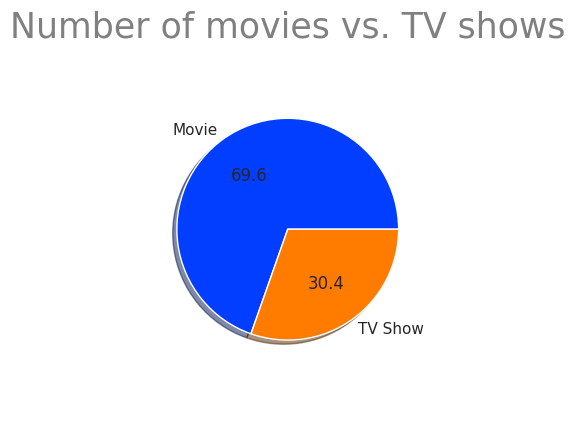

In [ ]:
Q1=data_for_analysis.value_counts("type")
sns.set_style("darkgrid")
plt.pie(Q1.values,labels=Q1.index,autopct="%1.1f", shadow="True",radius = 0.75)
plt.title("Number of movies vs. TV shows",fontdict={'color':"grey","size":25})
plt.show()

**Q2.Distribution of content by release year.**

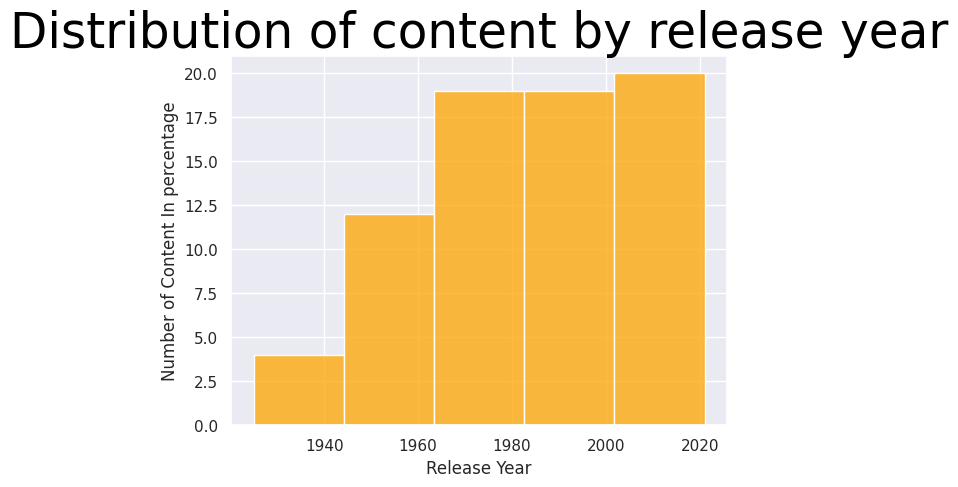

In [ ]:
#Distribution of content by release year.
Q2=pd.DataFrame(data_for_analysis.groupby("release_year")['release_year'].sum())
sns.histplot(Q2.index,color="orange",bins=5,element="bars")
plt.title("Distribution of content by release year",fontdict={'color':"black","size":35})
plt.xlabel("Release Year")
plt.ylabel("Number of Content In percentage")
plt.show()

**Q3: Solution Top countries producing content**

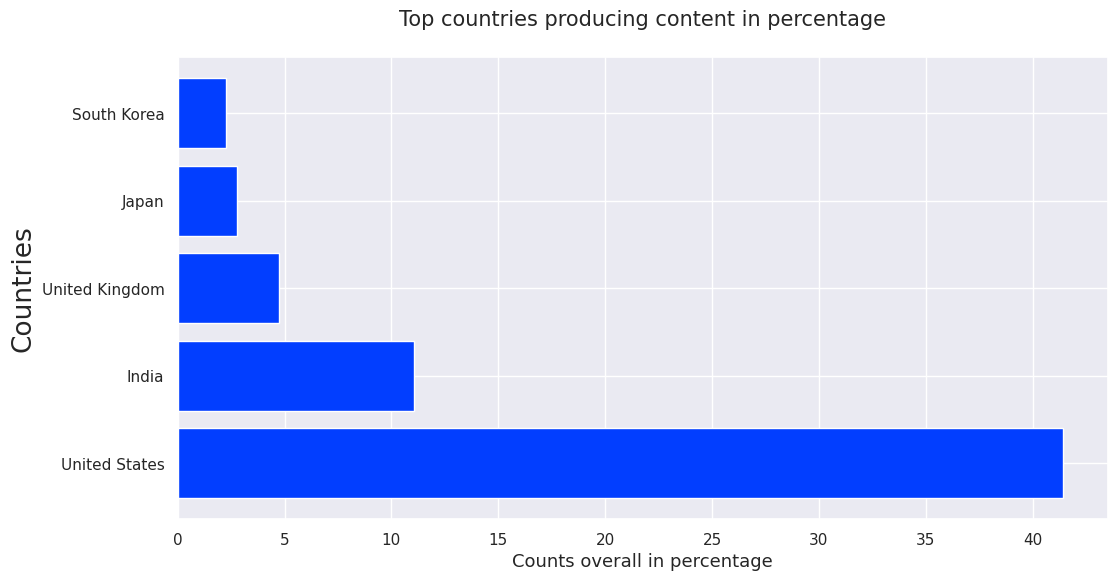

In [ ]:
#Checking Null Percentage In Country Variable and Imputing Mode Data since it is categorical variable.
null_counts_before=data_for_analysis.country.isnull().sum()/len(data_for_analysis)*100
value_counts_before=data_for_analysis.value_counts()
#finding The Mode
Mode_of_country=data_for_analysis.country.value_counts(normalize=True).idxmax()

#Now Imputing That Mode At The Place Of Null
data_for_analysis['country'].loc[data_for_analysis['country'].isnull()]=Mode_of_country

#After The Imputation percentage of null
value_counts_after=data_for_analysis.value_counts(normalize=True)

countries=round(data_for_analysis.value_counts("country")/len(data_for_analysis)*100,2).head(5)

plt.figure(figsize=[12,6])
sns.set_style("darkgrid")
plt.barh(width=countries.values,y=countries.index)
plt.title("Top countries producing content in percentage\n",size=15)
plt.ylabel("Countries",size=19)
plt.xlabel("Counts overall in percentage",size=13)
plt.show()


**Q4.Distribution of content ratings (e.g., PG, R).**

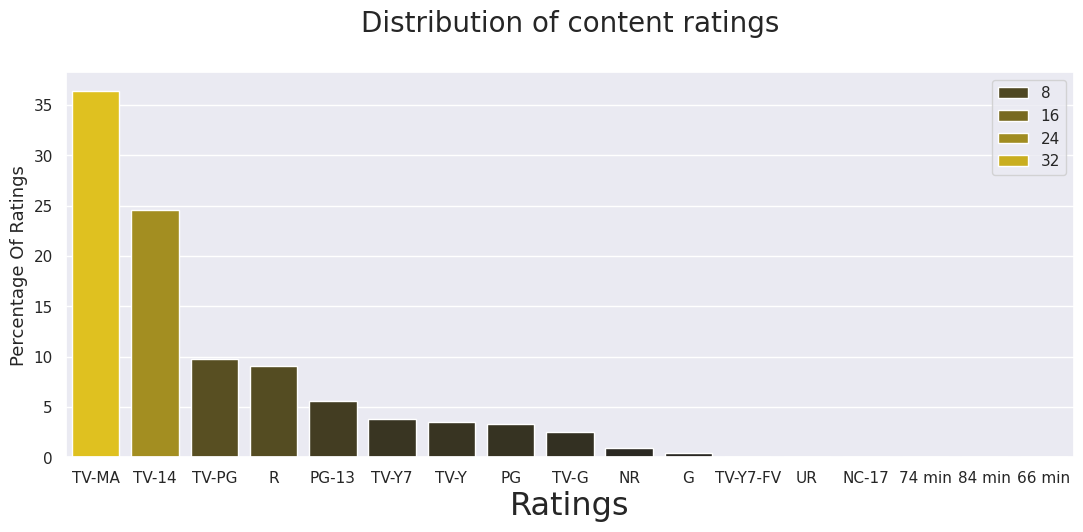

In [ ]:
Q4=data_for_analysis.value_counts("rating")/len(data_for_analysis)*100
plt.figure(figsize=([13,5]))
sns.barplot(x=Q4.index,y=Q4.values,color="gold",hue=Q4.values)
plt.title("Distribution of content ratings\n",size=20)
plt.ylabel("Percentage Of Ratings",size=13)
plt.xlabel("Ratings",size=23)
plt.show()

**Q5. Trends in content addition over the years.**

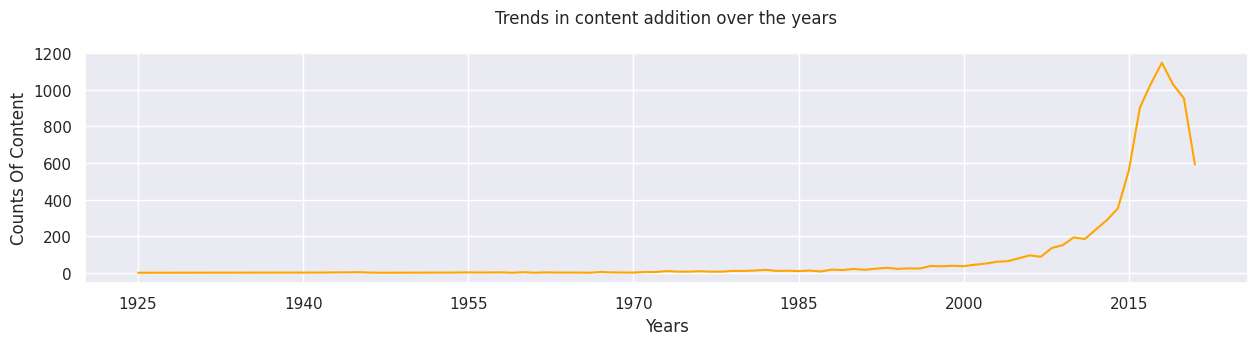

In [ ]:
A=pd.DataFrame(data_for_analysis.release_year.value_counts().sort_index())
sns.set_theme("notebook")
plt.figure(figsize=[15,3])
sns.set_palette("bright")
plt.plot(A.index,A.values,color="orange")
plt.xticks(range(1925,2024,15))
plt.title("Trends in content addition over the years\n")
plt.ylabel("Counts Of Content")
plt.xlabel("Years")
plt.show()

#Extra Exploration

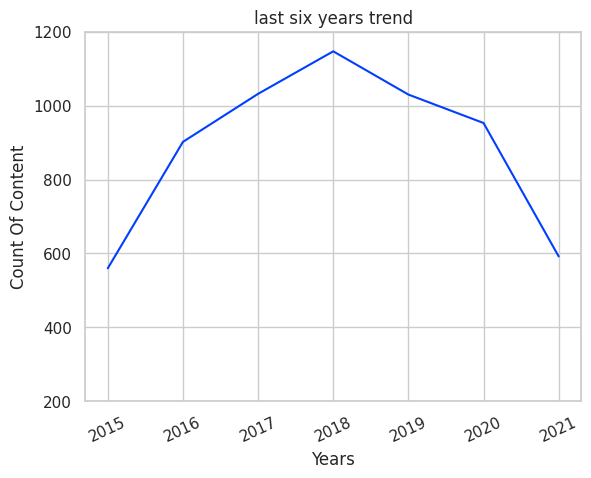

In [ ]:
#Extra Exploration
A.loc[A.index>=2015]
Topten=A.sort_values("count",ascending=False).head(7)
Topten.sort_index(ascending=True,inplace=True)
sns.set_style("whitegrid")
plt.plot(Topten)
plt.xticks(range(2015,2022,1))
plt.yticks(range(200,1400,200))
plt.title("last six years trend")
plt.ylabel("Count Of Content")
plt.xlabel("Years")
plt.xticks(rotation=25)
plt.show()